# Accessing Ghent University Library IIIF API
The [Ghent University Library](https://lib.ugent.be/en), provides open access and open data programmes to enhance access to research. They produce high-resolution scans of historic documents, print journals and promote open access for academic publications.

This notebook tries to introduce how to explore the repository, basically read a metadata record, obtain the fulltext and create a CSV dataset. 

The content used in this notebook is based on *la Russie illustrée* which is a periodical with 15 volumes and 748 issues. The digital content can be retrieved [here](https://lib.ugent.be/viewer/collection/RUG01-001643403#?c=&m=&s=&cv=&xywh=-2290%2C-224%2C7504%2C4200). 

Additional information about the collection is accessible [here](https://www.ghentcdh.ugent.be/content/blogpost-phaedra-claeys-spreadsheet-nightmares-and-database-dreams).


## Setting up things

In [25]:
import requests, csv
import json
import pandas as pd
import matplotlib.pyplot as plt

## Glogal configuration
In this section, we can add item that we want to use by providing its manifest URI.

In [4]:
manifestUrl = 'https://adore.ugent.be/IIIF/collections/RUG01-001643403'

## Retrieve the main collection element that corresponds to *La Russie illustrée*.


In [5]:
responseManifest = requests.get(manifestUrl)
print(responseManifest.url)

# retrieving the metadata
m = json.loads(responseManifest.text)

# the title
print('label:' + m['label'])
print('attribution:' + m['attribution'])
print('link viewer:' + m['related']['@id'])

https://adore.ugent.be/IIIF/collections/RUG01-001643403
label:Иллюстрированная Россия
attribution:Provided by Ghent University Library & La Contemporaine (Paris)
link viewer:https://lib.ugent.be/viewer/collection/RUG01-001643403


## A manifest has a field with called manifests will all the elements

In [6]:
for i in m['manifests']:
    print(i['@id'])

https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3A7B5F4EE8-1FBB-11E9-B253-F7AA97E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3A9A91A2E8-1FBB-11E9-A194-46B697E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3AB6BC7650-1FBB-11E9-A48C-FBBD97E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3ADB51C42A-1FBB-11E9-A7B7-2BC697E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3A02D9C7AE-1FBC-11E9-BE2E-9ACC97E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3A1AEECF2E-1FBC-11E9-BDA0-25D397E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3A44D5D9C2-1FBC-11E9-8BEF-97DC97E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3A77DDC26C-1FBC-11E9-A6B2-BBE497E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3AA9D7C1C8-1FBC-11E9-82B5-64EE97E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3AD95F4DBC-1FBC-11E9-B852-A1F897E089FE
https://adore.ugent.be/IIIF/manifests/archive.ugent.be%3A0B5

## Let's analyse the manifests one by one

### Creating a CSV file to store the metadata


In [7]:
csv_out = csv.writer(open('gent_records.csv', 'w'), delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
csv_out.writerow(['title', 'label', 'date', 'thumbnail', 'publisher', 'attribution', 'provenance', 'manifestItemUrl'])

77

In [8]:
for i in m['manifests']:
    title = label = date = thumbnail = publisher = attribution = provenance = manifestItemUrl = ''
    manifestItemUrl = i['@id']
    
    responseManifestItem = requests.get(manifestItemUrl)
    
    # retrieving the metadata
    manifestItem = json.loads(responseManifestItem.text)
    date = manifestItem['navDate']
    attribution = manifestItem['attribution']
    label = manifestItem['label']
    
    thumbnail = manifestItem['thumbnail']['@id']
    
    for metadata in manifestItem['metadata']:
        
        if metadata['label'] == 'Title' and not title: # first title
            title = metadata['value']
        elif metadata['label'] == 'Publisher':
            publisher = metadata['value']
        elif metadata['label'] == 'Provenance':
            provenance = metadata['value']
        else: pass
    print(label + " " + thumbnail)
    csv_out.writerow([title, label, date, thumbnail, publisher, attribution, provenance, manifestItemUrl])    

Иллюстрированная Россия (01) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A7B5F4EE8-1FBB-11E9-B253-F7AA97E089FE%3ADS.2/0,0,2926,3780/226,/0/default.jpg
Иллюстрированная Россия (02) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A9A91A2E8-1FBB-11E9-A194-46B697E089FE%3ADS.2/0,0,2945,3780/226,/0/default.jpg
Иллюстрированная Россия (03) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AB6BC7650-1FBB-11E9-A48C-FBBD97E089FE%3ADS.2/0,0,2714,3685/226,/0/default.jpg
Иллюстрированная Россия (04) https://adore.ugent.be/IIIF/images/archive.ugent.be%3ADB51C42A-1FBB-11E9-A7B7-2BC697E089FE%3ADS.2/0,0,2963,3685/226,/0/default.jpg
Иллюстрированная Россия (05) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A02D9C7AE-1FBC-11E9-BE2E-9ACC97E089FE%3ADS.2/0,0,3133,3685/226,/0/default.jpg
Иллюстрированная Россия (06) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A1AEECF2E-1FBC-11E9-BDA0-25D397E089FE%3ADS.2/0,0,3063,3685/226,/0/default.jpg
Иллюстрированная Россия (07) https://ado

Иллюстрированная Россия (1926-18) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AB6195800-1FD2-11E9-9059-A7DE97E089FE%3ADS.2/0,0,3024,3695/226,/0/default.jpg
Иллюстрированная Россия (1926-19) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AD0934FD8-1FD2-11E9-940F-4FE997E089FE%3ADS.2/0,0,2998,3712/226,/0/default.jpg
Иллюстрированная Россия (1926-20) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AF1F47BAC-1FD2-11E9-A5AA-DEF197E089FE%3ADS.2/0,0,2986,3711/226,/0/default.jpg
Иллюстрированная Россия (1926-21) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A13472610-1FD3-11E9-B041-84F997E089FE%3ADS.2/0,0,2995,3710/226,/0/default.jpg
Иллюстрированная Россия (1926-22) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A2E975642-1FD3-11E9-A081-B80398E089FE%3ADS.2/0,0,2988,3741/226,/0/default.jpg
Иллюстрированная Россия (1926-23) - Pushkin issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A476571E0-1FD3-11E9-AE00-BC0D98E089FE%3ADS.2/0,0,2972,3743/226,/0/defaul

Иллюстрированная Россия (1927-19) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A7F8191BC-1FD8-11E9-B0D6-80B897E089FE%3ADS.2/0,0,3030,3886/226,/0/default.jpg
Иллюстрированная Россия (1927-20) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A3BA1A7E2-1FDE-11E9-83B5-A91698E089FE%3ADS.2/0,0,3030,3894/226,/0/default.jpg
Иллюстрированная Россия (1927-21) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A5B3B1BE2-1FDE-11E9-92FF-941898E089FE%3ADS.2/0,0,3038,3902/226,/0/default.jpg
Иллюстрированная Россия (1927-22) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A78FAE022-1FDE-11E9-B6DF-3C1998E089FE%3ADS.2/0,0,2990,3894/226,/0/default.jpg
Иллюстрированная Россия (1927-23) - Pushkin issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A991D87E2-1FDE-11E9-98A7-1A1A98E089FE%3ADS.2/0,0,2990,3894/226,/0/default.jpg
Иллюстрированная Россия (1927-24) https://adore.ugent.be/IIIF/images/archive.ugent.be%3ABC0091D2-1FDE-11E9-BB04-C51A98E089FE%3ADS.2/0,0,2982,3910/226,/0/defaul

Иллюстрированная Россия (1928-18) https://adore.ugent.be/IIIF/images/archive.ugent.be%3ADC66242E-1FF1-11E9-AE53-29DB97E089FE%3ADS.2/0,0,3045,3859/226,/0/default.jpg
Иллюстрированная Россия (1928-19) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A051E62AA-1FF2-11E9-9D4F-7DDD97E089FE%3ADS.2/0,0,3037,3867/226,/0/default.jpg
Иллюстрированная Россия (1928-20) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A3E1AC03A-1FF2-11E9-9E08-CDDE97E089FE%3ADS.2/0,0,3006,3875/226,/0/default.jpg
Иллюстрированная Россия (1928-21) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A7860E846-1FF2-11E9-982A-02E197E089FE%3ADS.2/0,0,2982,3859/226,/0/default.jpg
Иллюстрированная Россия (1928-22) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AA0C9F7A0-1FF2-11E9-85AC-53E397E089FE%3ADS.2/0,0,3006,3851/226,/0/default.jpg
Иллюстрированная Россия (1928-23) - Pushkin issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3AC36D96D6-1FF2-11E9-A8A7-F4E497E089FE%3ADS.2/0,0,3026,3873/226,/0/defaul

Иллюстрированная Россия (1929-16) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A54D8533A-1FF9-11E9-85EA-80AC97E089FE%3ADS.2/0,0,2989,3867/226,/0/default.jpg
Иллюстрированная Россия (1929-17) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A77951854-1FF9-11E9-99F1-15AE97E089FE%3ADS.2/0,0,2997,3859/226,/0/default.jpg
Иллюстрированная Россия (1929-18) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AA05E6E7A-1FF9-11E9-9082-67B097E089FE%3ADS.2/0,0,3005,3867/226,/0/default.jpg
Иллюстрированная Россия (1929-19) - Easter issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3AD8D79C72-1FF9-11E9-9E68-80B297E089FE%3ADS.2/0,0,3013,3875/226,/0/default.jpg
Иллюстрированная Россия (1929-20) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A13713AD2-1FFA-11E9-9C16-BBB397E089FE%3ADS.2/0,0,3021,3859/226,/0/default.jpg
Иллюстрированная Россия (1929-21) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A48587940-1FFA-11E9-AAA6-75B697E089FE%3ADS.2/0,0,3021,3843/226,/0/default

Иллюстрированная Россия (1930-14) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A3BA21D54-2019-11E9-BAD7-FAEC97E089FE%3ADS.2/0,0,2986,3862/226,/0/default.jpg
Иллюстрированная Россия (1930-15) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A5CAF6272-2019-11E9-ADAC-A7EE97E089FE%3ADS.2/0,0,3018,3887/226,/0/default.jpg
Иллюстрированная Россия (1930-16) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A7C780A78-2019-11E9-8D59-04F097E089FE%3ADS.2/0,0,3018,3871/226,/0/default.jpg
Иллюстрированная Россия (1930-17) - Easter issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A9B334DEC-2019-11E9-8436-E7F097E089FE%3ADS.2/0,0,3026,3855/226,/0/default.jpg
Иллюстрированная Россия (1930-18) https://adore.ugent.be/IIIF/images/archive.ugent.be%3ABC19D2B0-2019-11E9-BF89-90F297E089FE%3ADS.2/0,0,3034,3879/226,/0/default.jpg
Иллюстрированная Россия (1930-19) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AD9AC3692-2019-11E9-83CD-EFF397E089FE%3ADS.2/0,0,3034,3864/226,/0/default

Иллюстрированная Россия (1931-12) https://adore.ugent.be/IIIF/images/archive.ugent.be%3ABC761B2A-2022-11E9-855A-B0CF97E089FE%3ADS.2/0,0,3121,3877/226,/0/default.jpg
Иллюстрированная Россия (1931-13) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AF5894496-2022-11E9-BCE1-F8D197E089FE%3ADS.2/0,0,3113,3877/226,/0/default.jpg
Иллюстрированная Россия (1931-14) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A242A42FA-2023-11E9-AD41-31D497E089FE%3ADS.2/0,0,3105,3869/226,/0/default.jpg
Иллюстрированная Россия (1931-15) - Easter issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A54501DB0-2023-11E9-B78F-89D597E089FE%3ADS.2/0,0,3081,3873/226,/0/default.jpg
Иллюстрированная Россия (1931-16) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A8766B100-2023-11E9-9C15-03D897E089FE%3ADS.2/0,0,3081,3893/226,/0/default.jpg
Иллюстрированная Россия (1931-17) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AB8AFBAC2-2023-11E9-B419-ADDA97E089FE%3ADS.2/0,0,3089,3893/226,/0/default

Иллюстрированная Россия (1932-09) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A336F5B92-202D-11E9-BAA6-98BB97E089FE%3ADS.2/0,0,3003,3756/226,/0/default.jpg
Иллюстрированная Россия (1932-10) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A7A41E5A8-202D-11E9-8E10-49BE97E089FE%3ADS.2/0,0,2818,3766/226,/0/default.jpg
Иллюстрированная Россия (1932-11) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AC06290DC-202D-11E9-A882-D0C097E089FE%3ADS.2/0,0,2991,3746/226,/0/default.jpg
Иллюстрированная Россия (1932-12) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A05CF1DDE-202E-11E9-93C4-94C597E089FE%3ADS.2/0,0,2926,3739/226,/0/default.jpg
Иллюстрированная Россия (1932-13) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A458E5C38-2037-11E9-89B7-FCE597E089FE%3ADS.2/0,0,3018,3747/226,/0/default.jpg
Иллюстрированная Россия (1932-14) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A8831C778-2037-11E9-9884-A6E897E089FE%3ADS.2/0,0,3018,3765/226,/0/default.jpg
Иллюстриро

Иллюстрированная Россия (1933-05) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A25D0335A-2F80-11E9-BA94-858EC252F320%3ADS.2/0,0,2929,3790/226,/0/default.jpg
Иллюстрированная Россия (1933-05) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AC7737842-2040-11E9-A3A4-F5BA97E089FE%3ADS.2/0,0,2929,3790/226,/0/default.jpg
Иллюстрированная Россия (1933-06) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A57635B84-2041-11E9-95B7-A3BD97E089FE%3ADS.2/0,0,3024,3805/226,/0/default.jpg
Иллюстрированная Россия (1933-07) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A5695748C-2F80-11E9-B27F-63A8C252F320%3ADS.2/0,0,2952,3784/226,/0/default.jpg
Иллюстрированная Россия (1933-07) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AB3CC502E-2041-11E9-A71C-79BF97E089FE%3ADS.2/0,0,2952,3784/226,/0/default.jpg
Иллюстрированная Россия (1933-08) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A29D609CC-2042-11E9-A8C7-39C197E089FE%3ADS.2/0,0,2944,3784/226,/0/default.jpg
Иллюстриро

Иллюстрированная Россия (1933-52) - Christmas issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A50879678-204A-11E9-B971-4D2098E089FE%3ADS.2/0,0,3072,3756/226,/0/default.jpg
Иллюстрированная Россия (1934-01) - New Year issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A811166AC-204A-11E9-A2C6-CA2198E089FE%3ADS.2/0,0,2778,3753/226,/0/default.jpg
Иллюстрированная Россия (1934-02) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AB67594D0-204A-11E9-9CF6-482398E089FE%3ADS.2/0,0,2762,3753/226,/0/default.jpg
Иллюстрированная Россия (1934-03) https://adore.ugent.be/IIIF/images/archive.ugent.be%3ADED99E58-204A-11E9-97D5-16A697E089FE%3ADS.2/0,0,2774,3753/226,/0/default.jpg
Иллюстрированная Россия (1934-04) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A137AA1A2-204B-11E9-A444-47A897E089FE%3ADS.2/0,0,2850,3784/226,/0/default.jpg
Иллюстрированная Россия (1934-05) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A40186A78-204B-11E9-B0DB-9EAC97E089FE%3ADS.2/0,0,2950

Иллюстрированная Россия (1934-50) - 500th issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3AC3E08D7E-206C-11E9-90F1-BB0398E089FE%3ADS.2/0,0,3066,3752/226,/0/default.jpg
Иллюстрированная Россия (1934-51) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AF784D75C-206C-11E9-B6F1-3B0698E089FE%3ADS.2/0,0,3059,3767/226,/0/default.jpg
Иллюстрированная Россия (1934-52) - Christmas issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A296353D4-206D-11E9-B79D-D60798E089FE%3ADS.2/0,0,3005,3767/226,/0/default.jpg
Иллюстрированная Россия (1935-01) - New Year issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A60C98BD6-206D-11E9-91CB-430A98E089FE%3ADS.2/0,0,2925,3755/226,/0/default.jpg
Иллюстрированная Россия (1935-02) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A86F3963A-206D-11E9-A68B-440C98E089FE%3ADS.2/0,0,2834,3763/226,/0/default.jpg
Иллюстрированная Россия (1935-03) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AB2E9040A-206D-11E9-8A97-EF0D98E089FE%3

Иллюстрированная Россия (1935-48) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A53754E0C-2077-11E9-B888-4FD097E089FE%3ADS.2/0,0,3051,3727/226,/0/default.jpg
Иллюстрированная Россия (1935-49) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A98DBF19E-2077-11E9-B012-F7E797E089FE%3ADS.2/0,0,3038,3745/226,/0/default.jpg
Иллюстрированная Россия (1935-50) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AF8A7A136-2077-11E9-9761-4CFD97E089FE%3ADS.2/0,0,2985,3723/226,/0/default.jpg
Иллюстрированная Россия (1935-51) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A35ACA2B6-2078-11E9-8EC1-540F98E089FE%3ADS.2/0,0,3035,3751/226,/0/default.jpg
Иллюстрированная Россия (1935-52) - Christmas issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3A6FBCE8E4-2078-11E9-9FAD-502398E089FE%3ADS.2/0,0,3043,3768/226,/0/default.jpg
Иллюстрированная Россия (1936-01) - New Year issue https://adore.ugent.be/IIIF/images/archive.ugent.be%3AAB7A3A80-2078-11E9-9E4D-59BA97E089FE%3ADS.2/0,0,2964

Иллюстрированная Россия (1936-46) https://adore.ugent.be/IIIF/images/archive.ugent.be%3ABCF9F4FE-2081-11E9-A15A-27DD97E089FE%3ADS.2/0,0,2999,3731/226,/0/default.jpg
Иллюстрированная Россия (1936-47) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AF38565F8-2081-11E9-835F-56FD97E089FE%3ADS.2/0,0,2999,3739/226,/0/default.jpg
Иллюстрированная Россия (1936-48) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A22FE20AE-2082-11E9-9C62-871598E089FE%3ADS.2/0,0,2939,3739/226,/0/default.jpg
Иллюстрированная Россия (1936-49) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A5100AE72-2082-11E9-AD40-81B297E089FE%3ADS.2/0,0,2969,3732/226,/0/default.jpg
Иллюстрированная Россия (1936-50) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A9AC25B5A-2082-11E9-BE25-80E597E089FE%3ADS.2/0,0,2954,3748/226,/0/default.jpg
Иллюстрированная Россия (1936-51) https://adore.ugent.be/IIIF/images/archive.ugent.be%3ACBA5662C-2082-11E9-8499-6B0098E089FE%3ADS.2/0,0,2931,3762/226,/0/default.jpg
Иллюстриро

Иллюстрированная Россия (1937-44) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A2CD4E742-20C4-11E9-90FA-B7B197E089FE%3ADS.2/0,0,2967,3828/226,/0/default.jpg
Иллюстрированная Россия (1937-45) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A6763153C-20C4-11E9-920F-52C897E089FE%3ADS.2/0,0,2959,3805/226,/0/default.jpg
Иллюстрированная Россия (1937-46) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A93815CE6-20C4-11E9-A4C5-86DA97E089FE%3ADS.2/0,0,2913,3813/226,/0/default.jpg
Иллюстрированная Россия (1937-47) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AC18D0086-20C4-11E9-9F4B-C1EB97E089FE%3ADS.2/0,0,2959,3813/226,/0/default.jpg
Иллюстрированная Россия (1937-48) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AF2866A1A-20C4-11E9-B89C-370398E089FE%3ADS.2/0,0,2959,3798/226,/0/default.jpg
Иллюстрированная Россия (1937-49) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A245BE54C-20C5-11E9-9691-2E1698E089FE%3ADS.2/0,0,2951,3798/226,/0/default.jpg
Иллюстриро

Иллюстрированная Россия (1938-42) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A8C9F079A-20CC-11E9-BC45-D20998E089FE%3ADS.2/0,0,2942,3762/226,/0/default.jpg
Иллюстрированная Россия (1938-43) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AB7A7578A-20CC-11E9-8992-BE0A98E089FE%3ADS.2/0,0,2942,3770/226,/0/default.jpg
Иллюстрированная Россия (1938-44) https://adore.ugent.be/IIIF/images/archive.ugent.be%3AE6271334-20CC-11E9-8B76-760C98E089FE%3ADS.2/0,0,2942,3770/226,/0/default.jpg
Иллюстрированная Россия (1938-45) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A0A7EC3F8-20CD-11E9-AE43-010E98E089FE%3ADS.2/0,0,2944,3771/226,/0/default.jpg
Иллюстрированная Россия (1938-46) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A2A47ECD2-20CD-11E9-9F50-B81198E089FE%3ADS.2/0,0,2928,3763/226,/0/default.jpg
Иллюстрированная Россия (1938-47) https://adore.ugent.be/IIIF/images/archive.ugent.be%3A51B148B8-20CD-11E9-BB9F-B61398E089FE%3ADS.2/0,0,2920,3763/226,/0/default.jpg
Иллюстриро

In [15]:
# Load the CSV file from GitHub.
# This puts the data in a Pandas DataFrame
df = pd.read_csv('gent_records.csv')

## Have a peek

In [16]:
df

,title,label,date,thumbnail,publisher,attribution,provenance,manifestItemUrl
0,La Russie illustrée.,Иллюстрированная Россия (01),1924-01-01T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
1,La Russie illustrée.,Иллюстрированная Россия (02),1924-03-01T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
2,La Russie illustrée.,Иллюстрированная Россия (03),1924-05-01T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
3,La Russie illustrée.,Иллюстрированная Россия (04),1924-07-01T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
4,La Russie illustrée.,Иллюстрированная Россия (05),1924-09-01T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
5,La Russie illustrée.,Иллюстрированная Россия (06),1924-11-01T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
6,La Russie illustrée.,Иллюстрированная Россия (07),1924-11-15T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
7,La Russie illustrée.,Иллюстрированная Россия (08),1924-12-01T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
8,La Russie illustrée.,Иллюстрированная Россия (09) - Christmas issue,1924-12-15T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....
9,La Russie illustrée.,Иллюстрированная Россия (10) - New Year issue,1925-01-01T00:00:00.000Z,https://adore.ugent.be/IIIF/images/archive.uge...,"Paris : La Russie illustrée, n.d.",Provided by Ghent University Library & La Cont...,BIB (1924-1939) Herkomst: Het originele tijdsc...,https://adore.ugent.be/IIIF/manifests/archive....


### How many items are there?

In [21]:
# How many images?
df['thumbnail'].count()

742

## What is the earliest date?

In [22]:
# What's the earliest start date?
df['date'].min()

'1924-01-01T00:00:00.000Z'

In [23]:
### Creating a chart to visualize the results

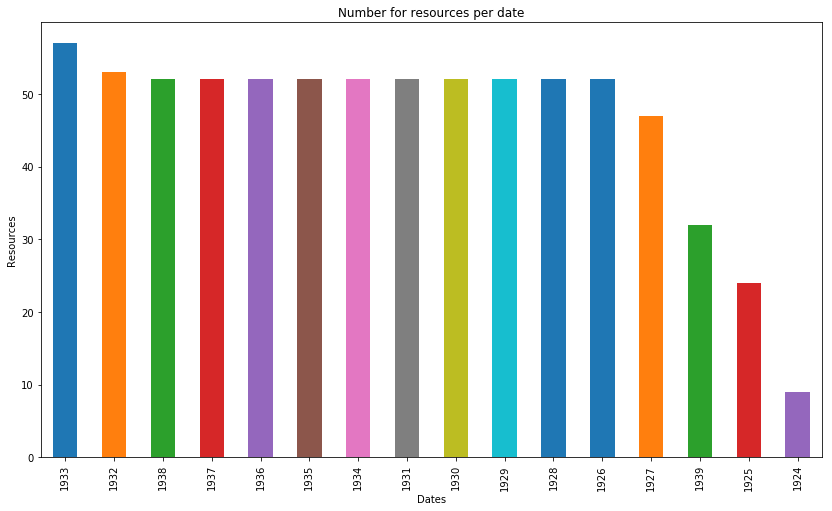

In [26]:
# First we create a new column in pandas with the year
df['year'] = pd.DatetimeIndex(df['date']).year

ax = df['year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for resources per date")
ax.set_xlabel("Dates")
ax.set_ylabel("Resources")
plt.show()

## Showing the thumbnails as a gallery

Once we have queried the repository and we have the metadata as a CSV file, let's show the results as a thumbnail gallery.

In [27]:
from IPython.display import HTML, Image

def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'

def gallery(images, row_height='auto'):
    """Shows a set of images in a gallery that flexes with the width of the notebook.
    
    Parameters
    ----------
    images: list of str or bytes
        URLs or bytes of images to display

    row_height: str
        CSS height value to assign to all images. Set to 'auto' by default to show images
        with their native dimensions. Set to a value like '250px' to make all rows
        in the gallery equal height.
    """
    figures = []
    for image in images:
        if isinstance(image, bytes):
            src = _src_from_data(image)
            caption = ''
        else:
            src = image
            caption = f'<figcaption style="font-size: 0.6em">{image}</figcaption>'
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
              
            </figure>
        ''')
    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')

In [28]:
gallery(df['thumbnail'], row_height='150px')